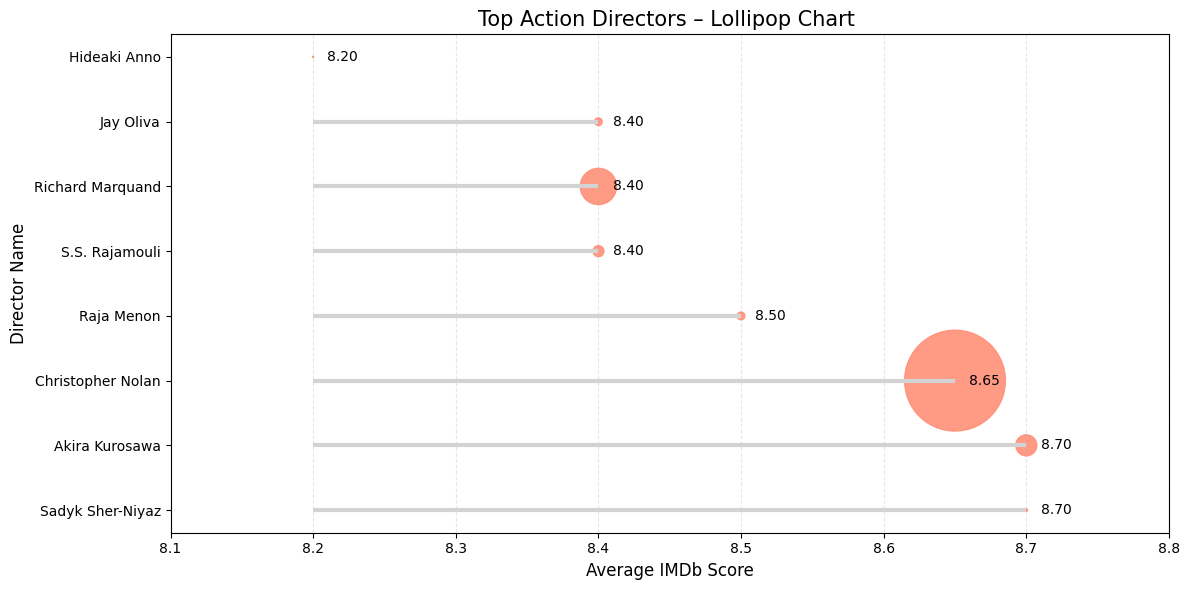

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------------
# 1) Load dataset
# -----------------------------------------------------
df = pd.read_csv('movie_metadata.csv')

# -----------------------------------------------------
# 2) Filter only Action movies (includes multi-genre)
# -----------------------------------------------------
df_action = df[df['genres'].str.contains('Action', case=False, na=False)]

# -----------------------------------------------------
# 3) Compute avg rating + popularity (num votes) per director
# -----------------------------------------------------
stats = (
    df_action.groupby('director_name')
    .agg(
        avg_rating=('imdb_score', 'mean'),
        total_votes=('num_voted_users', 'sum')
    )
    .dropna()
)

# -----------------------------------------------------
# 4) Keep top 8 directors by average IMDb rating
# -----------------------------------------------------
top_directors = stats.sort_values('avg_rating', ascending=False).head(8)

# -----------------------------------------------------
# 5) Plot LOLLIPOP CHART
# -----------------------------------------------------
plt.figure(figsize=(12, 6))

# Lollipop sticks (horizontal lines)
plt.hlines(
    y=top_directors.index,
    xmin=top_directors.avg_rating.min(),
    xmax=top_directors.avg_rating,
    color='lightgray',
    linewidth=3
)

# Circles (size = popularity)
plt.scatter(
    top_directors.avg_rating,
    top_directors.index,
    s=top_directors.total_votes / 1000,  # scaling
    color='#FF9078',
    alpha=0.9
)

# Annotate each rating
for director, rating in zip(top_directors.index, top_directors.avg_rating):
    plt.text(rating + 0.01, director, f"{rating:.2f}", va='center', fontsize=10)

# Axis labels + styling
plt.xlabel("Average IMDb Score", fontsize=12)
plt.ylabel("Director Name", fontsize=12)
plt.title("Top Action Directors – Lollipop Chart ", fontsize=15)

# -----------------------------------------------------
# 6) ZOOM X-AXIS (super important)
# -----------------------------------------------------
xmin = top_directors.avg_rating.min() - 0.1
xmax = top_directors.avg_rating.max() + 0.1
plt.xlim(xmin, xmax)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()